In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import os
import scipy.io
from scipy import stats
%matplotlib inline

from scipy.signal import savgol_filter
import octopus as oct

In [2]:
# Analysis of T4/T5 axons
filenames =['2023_04_12_50384_GC6f_PM4_004_2023-04-12_15.06_Ftrace_mean_TM',
            '2023_04_14_50384_GC6f_PM4_006_2023-04-14_13.47_Ftrace_mean_TM',
            '2023_04_14_50384_GC6f_PM225_012_2023-04-14_16.35_Ftrace_mean_TM',
            '2023_04_13_50384_GC6f_PM4_003_2023-04-13_11.29_Ftrace_mean_TM',
            '2023_04_13_50384_GC6f_PM4_007_2023-04-13_13.35_Ftrace_mean_TM',
            '2023_04_13_50384_GC6f_PM225_015_2023-04-13_15.39_Ftrace_mean_TM']

In [3]:
# Import Data
time = np.load('time.npy')

for i in range(len(filenames)):
    a = np.load(filenames[i] + '.npy')
    if(i==0):
        Ftrace_all = a
    if(i==1):
        Ftrace_all = np.stack((Ftrace_all,a), axis=2)   
    if(i>1):
        a = a[:,:,np.newaxis]
        Ftrace_all = np.concatenate((Ftrace_all,a), axis=2)

Ftrace_all.shape

(250L, 3L, 6L)

In [4]:
Ftrace_mean = np.mean(Ftrace_all[63:180,:,:], axis=0)

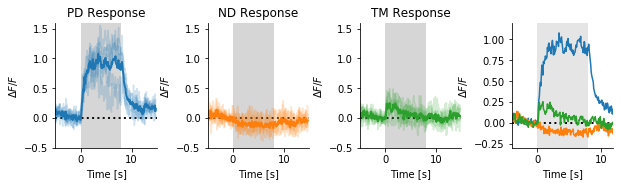

In [5]:
# PLOT dF/F fluorescence traces (Ftrace)

fig = plt.figure(figsize = (10, 2.3))
plt.subplots_adjust(wspace=0.5)
colors = sb.color_palette('husl')
    
ax = fig.add_subplot(141)
plt.axvspan(0, 8, facecolor='0.2', alpha=0.2)
ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 2)
plt.plot(time,Ftrace_all[:,0,:], color = 'C0', alpha = 0.2)
plt.plot(time,np.mean(Ftrace_all[:,0,:], axis=1), color = 'C0', linewidth = 2)
plt.xlim([-5,15])
plt.ylim([-0.5,1.6])
ax.set_ylabel('$\Delta F/F$', size=10)
ax.set_xlabel('Time [s]', size=10)
ax.set_title('PD Response', size=12)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax = fig.add_subplot(142)
plt.axvspan(0, 8, facecolor='0.2', alpha=0.2)
ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 2)
plt.plot(time,Ftrace_all[:,1,:], color = 'C1', alpha = 0.2)
plt.plot(time,np.mean(Ftrace_all[:,1,:], axis=1), color = 'C1', linewidth = 2)
plt.xlim([-5,15])
plt.ylim([-0.5,1.6])
ax.set_ylabel('$\Delta F/F$', size=10)
ax.set_xlabel('Time [s]', size=10)
ax.set_title('ND Response', size=12)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax = fig.add_subplot(143)
plt.axvspan(0, 8, facecolor='0.2', alpha=0.2)
ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 2)
plt.plot(time,Ftrace_all[:,2,:], color = 'C2', alpha = 0.2)
plt.plot(time,np.mean(Ftrace_all[:,2,:], axis=1), color = 'C2', linewidth = 2)
plt.xlim([-5,15])
plt.ylim([-0.5,1.6])
ax.set_ylabel('$\Delta F/F$', size=10)
ax.set_xlabel('Time [s]', size=10)
ax.set_title('TM Response', size=12)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax = fig.add_subplot(144)
plt.axvspan(0, 8, facecolor='0.5', alpha=0.2)
ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 2)
plt.plot(time,np.mean(Ftrace_all[:,0,:], axis=1), color = 'C0', linewidth = 1.5)
plt.plot(time,np.mean(Ftrace_all[:,1,:], axis=1), color = 'C1', linewidth = 1.5)
plt.plot(time,np.mean(Ftrace_all[:,2,:], axis=1), color = 'C2', linewidth = 1.5)
plt.xlim([-4,12])
plt.ylim([-0.3,1.2])
ax.set_ylabel('$\Delta F/F$', size=10)
ax.set_xlabel('Time [s]', size=10)
#ax.set_title('TM Response', size=12)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

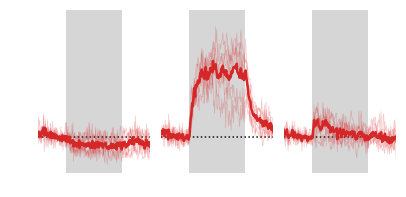

In [18]:
fig = plt.figure(figsize = (6.4,3))
plt.subplots_adjust(wspace = 0.1)

ax = fig.add_subplot(132)
ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 1.5)
plt.plot(time,Ftrace_all[:,0,:], color = 'C3', alpha = 0.25, linewidth = 0.7)
plt.plot(time,np.mean(Ftrace_all[:,0,:], axis=1), color = 'C3', linewidth = 2.5)
plt.axvspan(0, 8, facecolor='0.2', alpha=0.2)
plt.xlim([-4,12])
plt.ylim([-0.5,1.8])
plt.axis('off') 

ax = fig.add_subplot(131)
ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 1.5)
plt.plot(time,Ftrace_all[:,1,:], color = 'C3', alpha = 0.25, linewidth = 0.7)
plt.plot(time,np.mean(Ftrace_all[:,1,:], axis=1), color = 'C3', linewidth = 2.5)
plt.axvspan(0, 8, facecolor='0.2', alpha=0.2)
plt.xlim([-4,12])
plt.ylim([-0.5,1.8])
plt.axis('off')

ax = fig.add_subplot(133)
ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 1.5)
plt.plot(time,Ftrace_all[:,2,:], color = 'C3', alpha = 0.25, linewidth = 0.7)
plt.plot(time,np.mean(Ftrace_all[:,2,:], axis=1), color = 'C3', linewidth = 2.5)
plt.axvspan(0, 8, facecolor='0.2', alpha=0.2)
plt.xlim([-4,12])
plt.ylim([-0.5,1.8])

plt.axis('off')

bbox_inches = 'tight'
plt.savefig('C:\\Users\\gammer\\Desktop\\DATA Surface\\LPi Opponency\\plots_LPi_ms\\
FigS5_VT50384_TM_GC6f_all_traces.pdf',bbox_inches='tight', dpi=600, transparent=True)
plt.show()

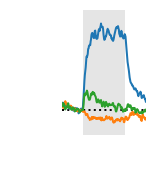

In [8]:
fig = plt.figure(figsize = (1.5,2.3))

ax = fig.add_subplot(111)
plt.axvspan(0, 8, facecolor='0.5', alpha=0.2)
ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 2)
plt.plot(time,savgol_filter(np.mean(Ftrace_all[:,0,:], axis=1),3,1), color = 'C0', linewidth = 2)
plt.plot(time,savgol_filter(np.mean(Ftrace_all[:,1,:], axis=1),3,1), color = 'C1', linewidth = 2)
plt.plot(time,savgol_filter(np.mean(Ftrace_all[:,2,:], axis=1),3,1), color = 'C2', linewidth = 2)
plt.xlim([-4,12])
plt.ylim([-0.3,1.2])
ax.set_ylabel('-$\Delta F/F$', size=10)
ax.set_xlabel('Time [s]', size=10)
#ax.set_title('TM Response', size=12)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.axis('off')

bbox_inches = 'tight'
#plt.savefig('C:\\Users\\gammer\\Desktop\\DATA Surface\\LPi Opponency\\plots_LPi_ms\\
#Fig6_SplitT4c_TM_GC6f_traces.pdf',bbox_inches='tight', dpi=600, transparent=True)
plt.show()

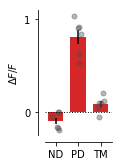

In [24]:
# Make Bar Plot of Responses
pos = [0, 1, 2]
fig = plt.figure(figsize = (0.5*len(pos)-0.3, 2.3))

ax = fig.add_subplot(111)
w=0.7

ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 1)

ax.bar(1,height=[np.mean(Ftrace_mean[0,:])],width=w,color='C3',yerr=[stats.sem(Ftrace_mean[0,:])])
for i in range(len(Ftrace_mean[0,:])):
    ax.scatter(1 + np.random.random(1) * w/2 - w/4, Ftrace_mean[0,i], s=25, color='0.3', alpha=0.4, zorder = 2)
    
ax.bar(0,height=[np.mean(Ftrace_mean[1,:])],width=w,color='C3',yerr=[stats.sem(Ftrace_mean[1,:])])
for i in range(len(filenames)):
    ax.scatter(0 + np.random.random(1) * w/2 - w/4, Ftrace_mean[1,i], s=25, color='0.3', alpha=0.4, zorder = 2)
    
ax.bar(2,height=[np.mean(Ftrace_mean[2,:])],width=w,color='C3',yerr=[stats.sem(Ftrace_mean[2,:])])
for i in range(len(Ftrace_mean[2,:])):
    ax.scatter(2 + np.random.random(1) * w/2 - w/4, Ftrace_mean[2,i], s=25, color='0.3', alpha=0.4, zorder = 2)
   
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_position(('outward', 7))
ax.spines['bottom'].set_position(('outward', 7))
ax.set_xticks([0,1,2])
ax.set_xticklabels(('ND', 'PD', 'TM'), size=10)
ax.set_yticks([0,1])
ax.set_yticklabels(('0', '1'), size=10)
ax.set_ylabel('$\Delta F/F$', size=10)
plt.ylim([-0.25,1.1])

bbox_inches = 'tight'
plt.savefig('C:\\Users\\gammer\\Desktop\\DATA Surface\\LPi Opponency\\plots_LPi_ms\\\
FigS5_VT50384_TM_GC6f_boxplots.pdf',bbox_inches='tight', dpi=600, transparent=True)
plt.show()

In [10]:
# Calculate Motion Opponent Suppression Index
MOSI = (Ftrace_mean[0,:] - Ftrace_mean[2,:]) / (Ftrace_mean[0,:])

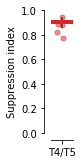

In [19]:
# Make Scatter Plot of MOSI

pos = [0]

fig = plt.figure(figsize = (0.4*len(pos), 2.25))

ax = fig.add_subplot(111)
w = 0.6
wb = 0.6
data = [MOSI]
colors = ['C3', 'C3']

ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 1)

for j in range (len(data)):
    ax.plot([pos[j]-w/2, pos[j]+w/2],[np.mean(data[j]),np.mean(data[j])],
            color=colors[j], linestyle='-', linewidth = 4)
    ax.errorbar(pos[j],np.mean(data[j]),yerr=[stats.sem(data[j])], color='k',zorder = 0)    
    for i in range(len(data[j])):
        ax.scatter(pos[j] + np.random.random(1) * w/2 - w/4, data[j][i], s=25, color=colors[j], alpha=0.5, zorder = 2) 
   
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_position(('outward', 7))
ax.spines['bottom'].set_position(('outward', 7))
ax.set_xticks(pos)
ax.set_xticklabels(('T4/T5','TNT'), size=10)
ax.set_ylabel('Suppression index', size=10)
plt.ylim([0,1])

bbox_inches = 'tight'
plt.savefig('C:\\Users\\gammer\\Desktop\\DATA Surface\\LPi Opponency\\plots_LPi_ms\\\
FigS5_VT50384_TM_GC6f_MOSI.pdf',bbox_inches='tight', dpi=600, transparent=True)
plt.show()

In [12]:
# Save Ftrace as numpy array
save_path = 'C:\\Users\\gammer\\Desktop\\DATA Surface\\Calcium_Data\\LPi Calcium Imaging\\SplitT4c_GC6f\\\
Transparent Motion'

#np.save(os.path.join(save_path, 'SplitT4c_TM_Ftrace_all_axons.npy'), Ftrace_all)
#np.save(os.path.join(save_path, 'time.npy'), time)